# Обзор датасетов

In [1]:
import warnings
for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category = warn)

## Примеры использования генератора датасетов

In [2]:
from preprocessor import DatasetGenerator, DatasetConfig
from datasets_params import DatasetName

generator = DatasetGenerator(DatasetName.IMDB)

### Полный пайплайн получения тензоров

In [3]:
(X_train, y_train), (X_val, y_val), (X_test, y_test), embedding_layer = generator.generate_dataset()

X_train.shape

torch.Size([10000, 300, 64])

### Получение словаря (после вызова `build_vocabulary` или `generate_dataset`)

In [4]:
vocab, id2word = generator.get_vocabulary()
id2word[123]

'means'

### Настройка конфига

In [5]:
config = DatasetConfig(
    train_size=128,
    val_size=64,
    test_size=32,
)

custom_generator = DatasetGenerator(dataset_name=DatasetName.POLARITY, config=config)

train_df, val_df, test_df = custom_generator.load_raw_data()
train_df.shape, val_df.shape, test_df.shape

((128, 3), (64, 3), (32, 3))

## Визуализация для датасета `stanfordnlp/imdb`

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nltk.probability import FreqDist

In [7]:
generator = DatasetGenerator(DatasetName.IMDB)

df_imdb_train, df_imdb_val, df_imdb_test = generator.load_raw_data()
df_imdb_full = pd.concat([df_imdb_train, df_imdb_val, df_imdb_test])

### Базовая информация о датасете

In [8]:
print(f"Общее количество примеров: {len(df_imdb_full)}")
print(f"Количество классов: {df_imdb_full["label"].nunique()}")
print("\nПервые 5 примеров:")
df_imdb_full.head()

Общее количество примеров: 20000
Количество классов: 2

Первые 5 примеров:


,text,label
6868,"Dumb is as dumb does, in this thoroughly unint...",0
24016,I dug out from my garage some old musicals and...,1
9668,After watching this movie I was honestly disap...,0
13640,This movie was nominated for best picture but ...,1
14018,Just like Al Gore shook us up with his painful...,1


### Распределение классов

In [9]:
df_imdb_full["label"].value_counts()

label
1    10010
0     9990
Name: count, dtype: int64

### Анализ длины текстов

Описательная статистика длины текстов:
count    20000.00000
mean       231.54310
std        172.10072
min          4.00000
25%        127.00000
50%        173.00000
75%        280.00000
max       2470.00000
Name: text_length, dtype: float64


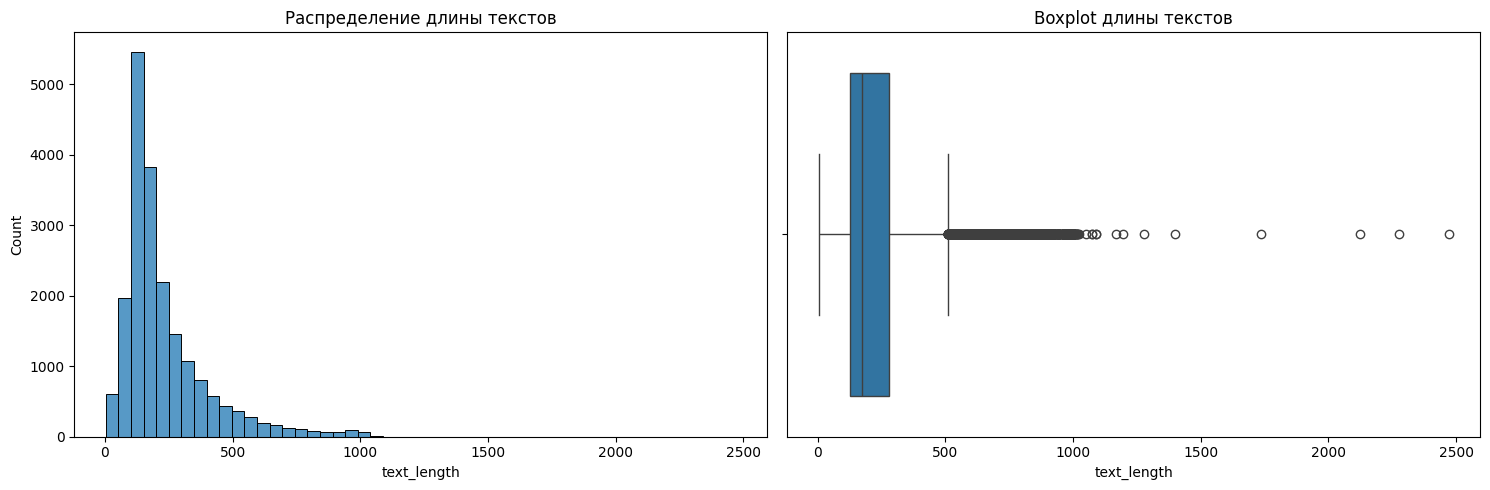

In [10]:
df_imdb_full["text_length"] = df_imdb_full["text"].apply(lambda x: len(x.split()))

print("Описательная статистика длины текстов:")
print(df_imdb_full["text_length"].describe())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_imdb_full["text_length"], bins=50)
plt.title("Распределение длины текстов")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_imdb_full["text_length"])
plt.title("Boxplot длины текстов")
plt.tight_layout()

### Анализ словаря

Общее количество уникальных слов: 100868
20 самых частых слов:
[('the', 266485), (',', 217172), ('.', 186495), ('and', 129950), ('a', 128903), ('of', 115424), ('to', 107088), ('is', 87081), ('/', 80891), ('>', 80860), ('<', 80789), ('br', 80703), ('it', 75362), ('in', 74001), ('i', 69505), ('this', 59897), ('that', 57380), ("'s", 49042), ('was', 40141), ('as', 36666)]


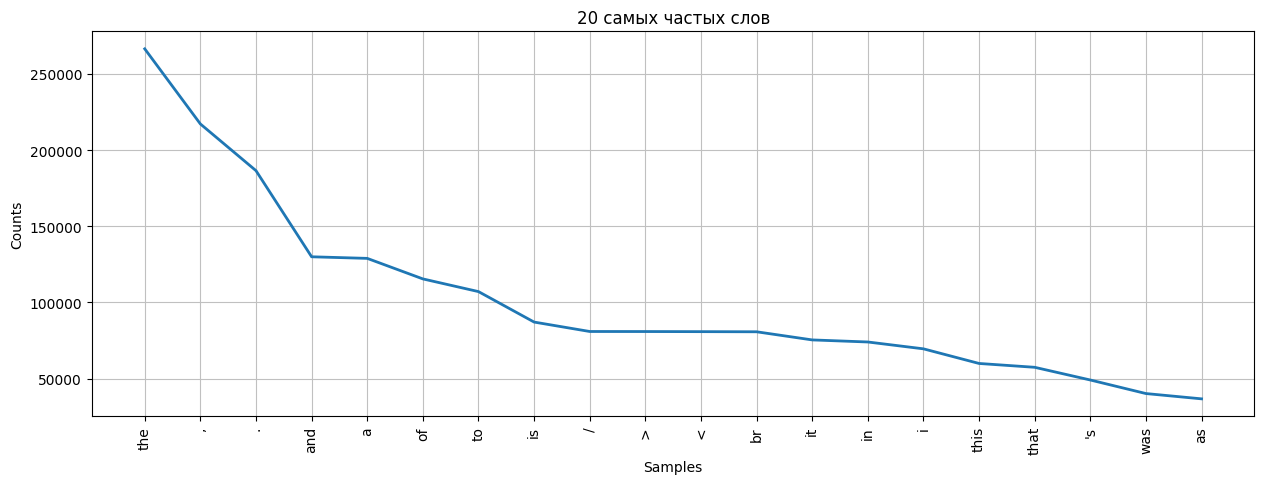

In [11]:
tokenized_texts = generator.preprocess_text(df_imdb_full["text"].tolist())
all_tokens = [item for sublist in tokenized_texts for item in sublist]

fdist = FreqDist(all_tokens)
print(f"Общее количество уникальных слов: {len(fdist)}")
print("20 самых частых слов:")
print(fdist.most_common(20))

plt.figure(figsize=(15, 5))
fdist.plot(20, title="20 самых частых слов")
None

### Длина текстов по классам

Text(0.5, 1.0, 'Распределение длины текстов по классам')

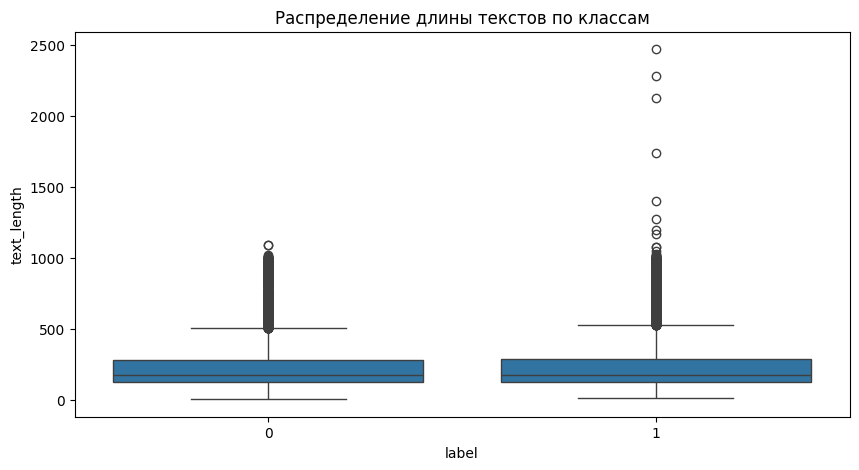

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_imdb_full, x="label", y="text_length")
plt.title("Распределение длины текстов по классам")

### Примеры текстов по классам

In [13]:
for label in sorted(df_imdb_full["label"].unique()):
    print(f"\nКласс {label}:")
    sample = df_imdb_full[df_imdb_full["label"] == label]["text"].sample(1).values[0]
    print(f"{sample[:500]}...")


Класс 0:
I'm basing this on my observations of one episode I saw last night (9/27/06). I don't think I'll be watching again. The acting was totally wooden, the plot completely predictable, the ending totally unrealistic -- I mean who would believe a 30 million dollar judgment for the death of a recovering drug addict with terminal cancer? The lead actor (Victor Garber) seemed so uncomfortable, almost embarrassed in his role -- perhaps he realized how bad the writing was!! I fully realize that the drama o...

Класс 1:
I really enjoyed the pilot, it was as amazing as I hoped it would be, if not better. Patrick Warburton was a riot, although at first i thought that I wouldn't be able to stand his character. Him and Megyn Price Had little chemistry at all, but hopefully as the season goes on they'll get more comfortable around each other. It must have been weird for Megyn to go from being the star on her last show ["Grounded For Life"] to being a co-star. <br /><br />Bianca Kajlich and Ol

## Визуализация для датасета `fancyzhx/amazon_polarity`

In [14]:
generator = DatasetGenerator(DatasetName.POLARITY)

df_polar_train, df_polar_val, df_polar_test = generator.load_raw_data()
df_polar_full = pd.concat([df_polar_train, df_polar_val, df_polar_test])

### Базовая информация о датасете

In [15]:
print(f"Общее количество примеров: {len(df_polar_full)}")
print(f"Количество классов: {df_polar_full["label"].nunique()}")
print("\nПервые 5 примеров:")
df_polar_full.head()

Общее количество примеров: 20000
Количество классов: 2

Первые 5 примеров:


,label,title,content
2079998,0,Expensive Junk,This product consists of a piece of thin flexi...
1443106,0,Toast too dark,"Even on the lowest setting, the toast is too d..."
3463669,1,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...
2914699,0,Are we pretending everyone is married?,The authors pretend that parents neither die n...
1603231,0,Not worth your time,"Might as well just use a knife, this product h..."


### Распределение классов

In [16]:
df_polar_full["label"].value_counts()

label
1    10106
0     9894
Name: count, dtype: int64

### Анализ длины текстов

Описательная статистика длины текстов:
count    20000.000000
mean        73.689050
std         42.197284
min          9.000000
25%         38.000000
50%         65.000000
75%        102.000000
max        202.000000
Name: text_length, dtype: float64


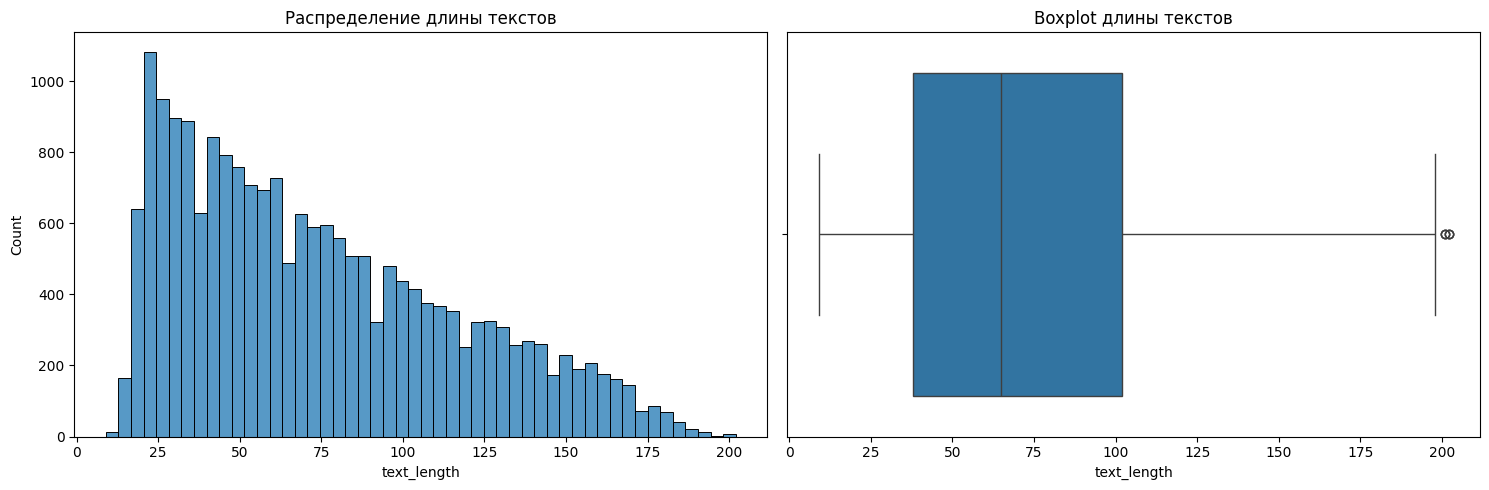

In [17]:
df_polar_full["text_length"] = df_polar_full["content"].apply(lambda x: len(x.split()))

print("Описательная статистика длины текстов:")
print(df_polar_full["text_length"].describe())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_polar_full["text_length"], bins=50)
plt.title("Распределение длины текстов")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_polar_full["text_length"])
plt.title("Boxplot длины текстов")
plt.tight_layout()

### Анализ словаря

Общее количество уникальных слов: 61120
20 самых частых слов:
[('.', 79235), ('the', 75553), (',', 54469), ('i', 43963), ('and', 41193), ('a', 37385), ('to', 37211), ('it', 34717), ('of', 30205), ('this', 27750), ('is', 27048), ('in', 17191), ('for', 16055), ('that', 15680), ('was', 13456), ('you', 12999), ('!', 12055), ('not', 11602), ('but', 10971), ('with', 10767)]


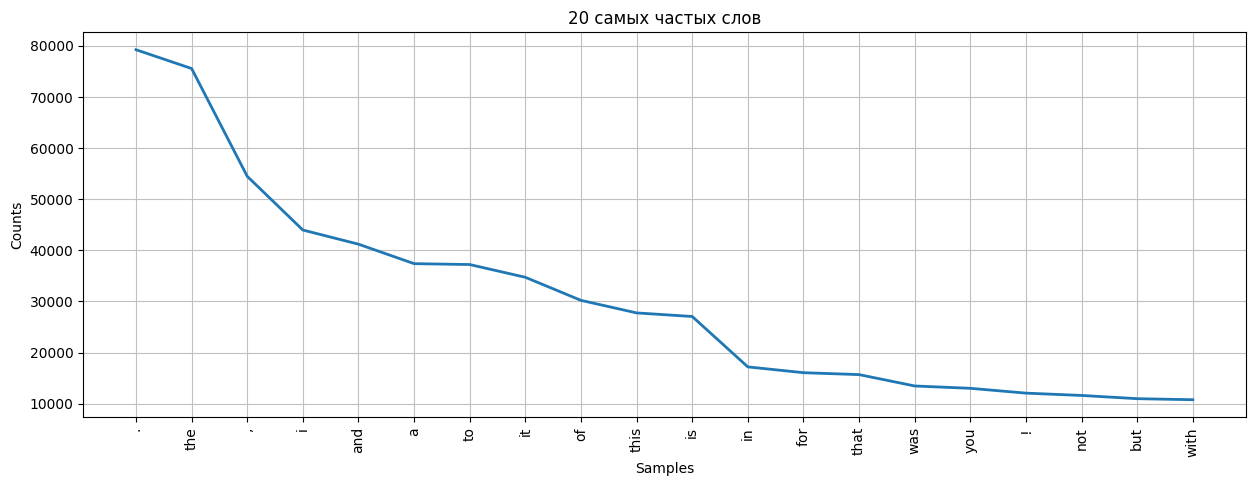

In [18]:
tokenized_texts = generator.preprocess_text(df_polar_full["content"].tolist())
all_tokens = [item for sublist in tokenized_texts for item in sublist]

fdist = FreqDist(all_tokens)
print(f"Общее количество уникальных слов: {len(fdist)}")
print("20 самых частых слов:")
print(fdist.most_common(20))

plt.figure(figsize=(15, 5))
fdist.plot(20, title="20 самых частых слов")
None

### Длина текстов по классам

Text(0.5, 1.0, 'Распределение длины текстов по классам')

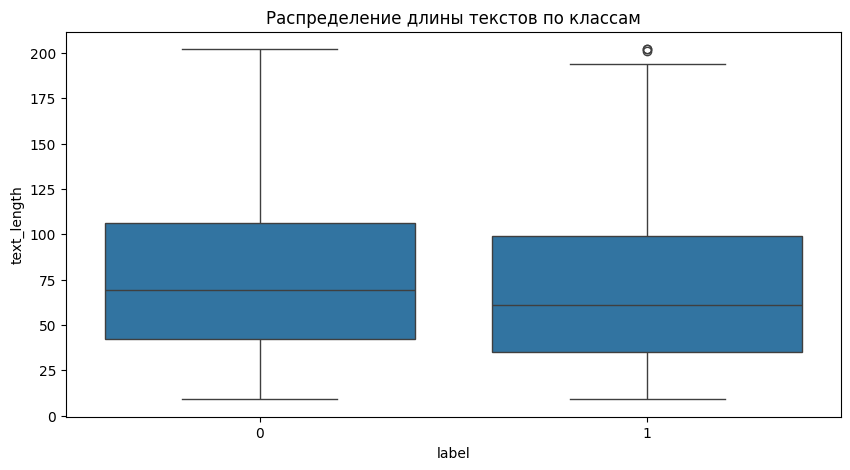

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_polar_full, x="label", y="text_length")
plt.title("Распределение длины текстов по классам")

### Примеры текстов по классам

In [20]:
for label in sorted(df_polar_full["label"].unique()):
    print(f"\nКласс {label}:")
    sample = df_polar_full[df_polar_full["label"] == label]["content"].sample(1).values[0]
    print(f"{sample[:500]}...")


Класс 0:
I just used this product with disasterous consequences.I read the instructions on the back and cleared the area where I was going to be applying the product to the window. I finished wetting down the window with a few coats and then looked around--- a fine mist had spread EVERYWHERE in my house, as in MULTIPLE rooms away from where I was spraying. And it has coated my hard-wood floors.Now apparently I need to buy acetone to remove it from the floors, which will also probably ruin the finish curr...

Класс 1:
This album was a tight album. TRU is da best group in hip hop. Not The Hot Boys,Big Tymers or The Lox. It's all about TRU. No Limit 4 life....
